In [7]:
%matplotlib inline

import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16, 3)

import pywt
sys.path.append("../wavelet_functions")
from dan_wavelets import dwt, idwt, modwt, imodwt, mra

In [2]:
la8 = pd.read_csv("../datasets/la8.csv", index_col=0)


In [3]:
la8

,length,h,g
1,8,0.032223,-0.075766
2,8,0.012604,-0.029636
3,8,-0.099220,0.497619
4,8,-0.297858,0.803739
5,8,0.803739,0.297858
6,8,-0.497619,-0.099220
7,8,-0.029636,-0.012604
8,8,0.075766,0.032223


In [4]:
signal = pd.read_csv("../datasets/ibm_returns.csv", header=None, index_col=0, names=["returns"]).squeeze()

In [5]:
signal = np.abs(signal)

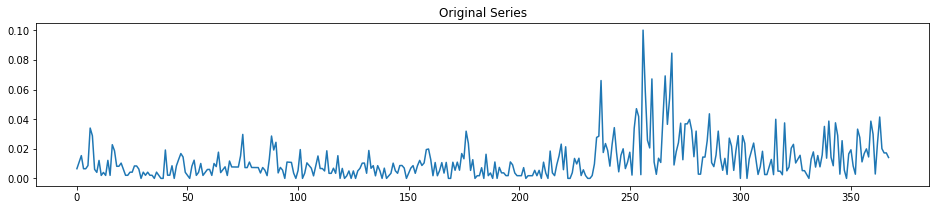

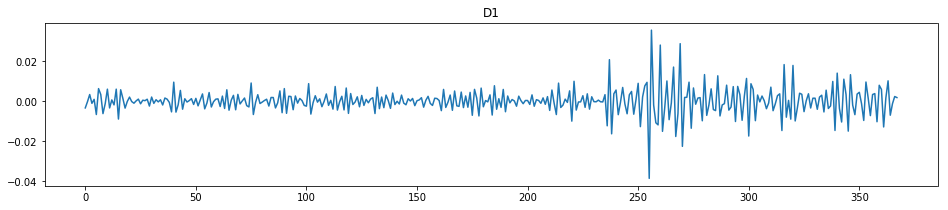

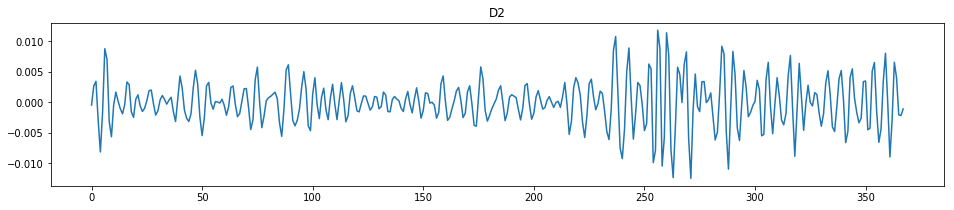

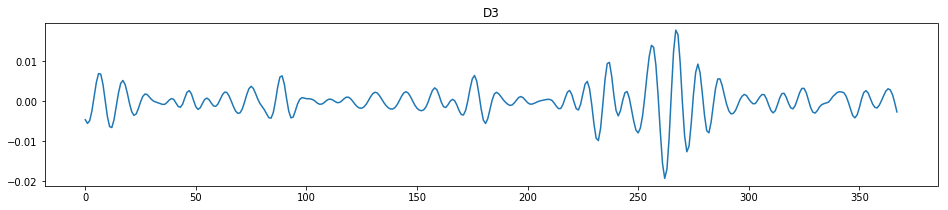

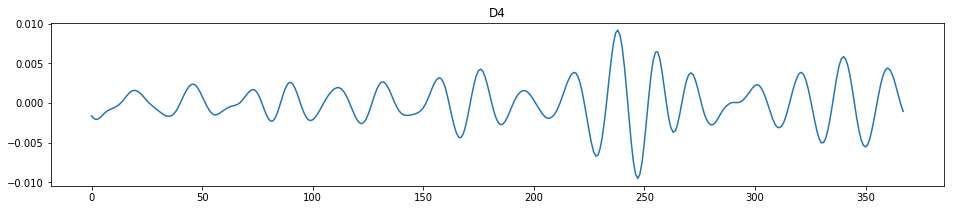

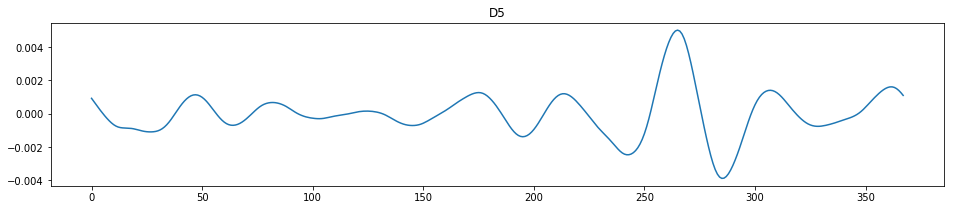

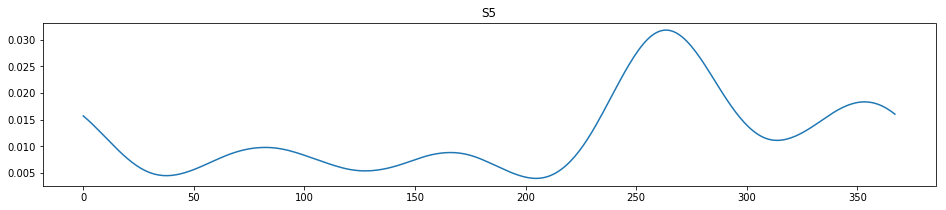

In [8]:
mra(signal, 4, la8.h, la8.g, 8)